# Foremast-brain Algorithms

In [1]:
import numpy as np
import pandas as pd
import json
from datetime import datetime
from dateutil.parser import parse
import sys
sys.path.append('../')
from mlalgms.statsmodel import calculateHistoricalParameters

## load data from csv

In [2]:
anomaly_data = pd.read_csv("../../test_data/timeserials.csv")
### print size
print(anomaly_data.shape)
### print columns
print(anomaly_data.columns.values)

(4032, 2)
['timestamp' 'value']


In [3]:
from mlalgms.statsmodel import detectAnomalies
from utils.converterutils import addHeader

In [4]:


idx = anomaly_data.timestamp.values
anomaly_data_ds = [parse(d) for d in idx ]
y = anomaly_data.value.values
df = addHeader (anomaly_data_ds, y)





## PLT the data graph

In [5]:
# Drawing libraries
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
from IPython.core.pylabtools import figsize

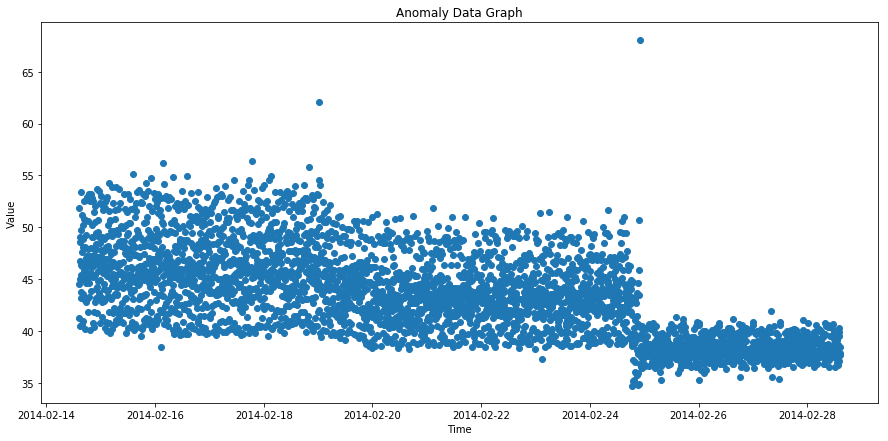

In [6]:
#concert date format from string to datetime for display
plt_ds = [date2num(d)  for d in anomaly_data_ds]
plt.figure(figsize=(15, 7))
plt.plot_date(plt_ds, df.y)
plt.title('Anomaly Data Graph')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


# MOVING_AVERAGE_ALL ALGM

## No Test Train Split Anomaly Detection

In [7]:
#Calculate mean,stdev
mean, deviation = calculateHistoricalParameters(df)
print(mean,", ",deviation)

43.11037160218238 ,  4.303030931759863


In [8]:
#detect anomalies
ads, atsdata,anomalies = detectAnomalies( df,mean, deviation)

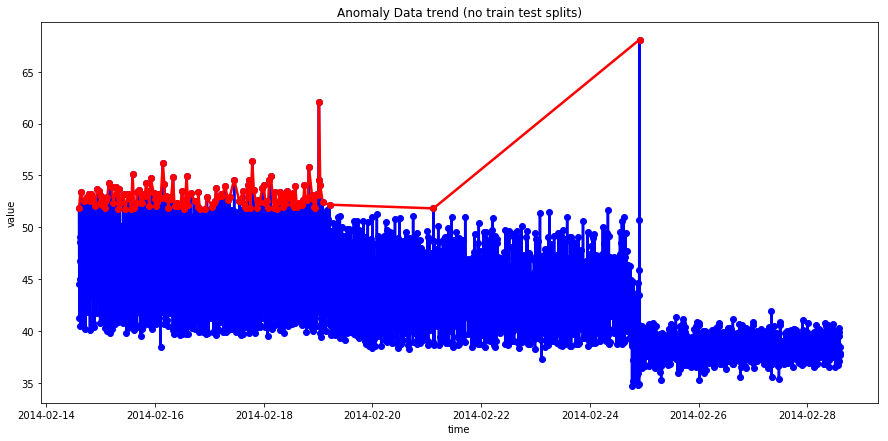

In [9]:

plt.figure(figsize=(15, 7))




plt.plot_date(plt_ds, df.y,color="blue", linewidth=2.5, linestyle="-")
plat_ads= [date2num(d)  for d in ads]

plt.plot_date(plat_ads, atsdata,color="red", linewidth=2.5, linestyle="-")
plt.title('Anomaly Data trend (no train test splits)')
plt.xlabel('time')
plt.ylabel('value')
plt.show()


## Test Train Split Anomaly Detection

In [133]:
from mlalgms.evaluator import ts_train_test_split

In [134]:
train, test = ts_train_test_split(df, split_ratio=0.7)

plat_train = [date2num(d)  for d in train.index.get_values()]
plat_test_origin = [date2num(d)  for d in test.index.get_values()]

In [135]:
mean_train, deviation_train = calculateHistoricalParameters(train)
print(mean_train,",", deviation_train)

44.94927225372074 , 3.6178904235336473


In [136]:
ts_test, adata_test,anomalies_test = detectAnomalies( test,mean_train, deviation_train)

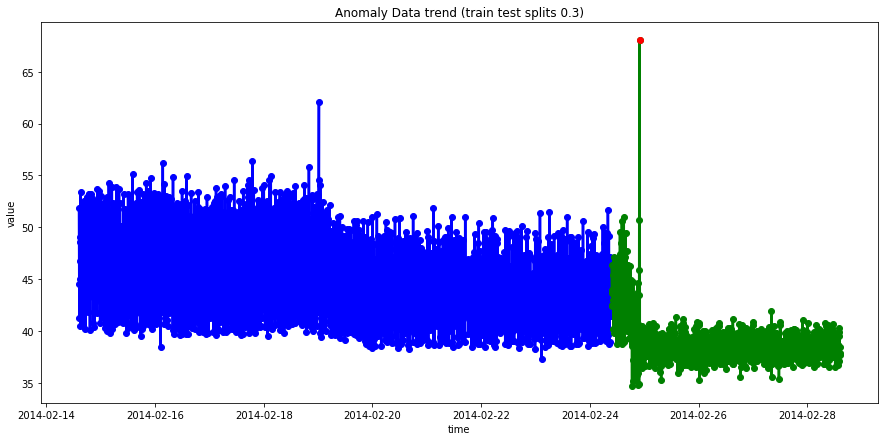

In [137]:
plat_test = [date2num(d)  for d in ts_test]
plt.figure(figsize=(15, 7))

plt.plot_date(plat_train, train.y,color="blue", linewidth=2.5, linestyle="-")
plt.plot_date(plat_test_origin, test.y,color="green", linewidth=2.5, linestyle="-")
plt.plot_date(plat_test, adata_test,color="red", linewidth=2.5, linestyle="-")

plt.title('Anomaly Data trend (train test splits 0.3)')
plt.xlabel('time')
plt.ylabel('value')
plt.show()

# MOVING_AVERAGE ALGORITHM

In [138]:
from mlalgms.statsmodel import calculateMovingAverageParameters,detectLowerUpperAnomalies

In [139]:
lower_bound, upper_bound = calculateMovingAverageParameters(train, 0, 2)
print(lower_bound, ", ", upper_bound) 

41.672 ,  48.22654450744149


In [140]:
ts_test, adata_test,flags =detectLowerUpperAnomalies(test, lower_bound , upper_bound, bound=1)

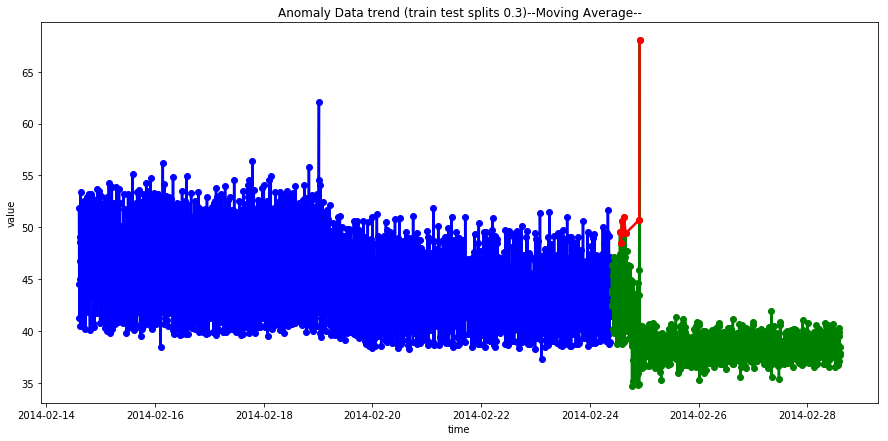

In [141]:
plat_test = [date2num(d)  for d in ts_test]
plt.figure(figsize=(15, 7))

plt.plot_date(plat_train, train.y,color="blue", linewidth=2.5, linestyle="-")
plt.plot_date(plat_test_origin, test.y,color="green", linewidth=2.5, linestyle="-")
plt.plot_date(plat_test, adata_test,color="red", linewidth=2.5, linestyle="-")




plt.title('Anomaly Data trend (train test splits 0.3)--Moving Average--')
plt.xlabel('time')
plt.ylabel('value')
plt.show()

# EXPONENTIAL_SMOOTHING Algorithm

In [142]:
from mlalgms.statsmodel import calculateExponentialSmoothingParameters

In [149]:
lower_bound, upper_bound= calculateExponentialSmoothingParameters(train, 0.1, 2)
print(lower_bound, ", ", upper_bound) 

34.729534259539314 ,  52.317467870928006


In [150]:
ts_test, adata_test,flags =detectLowerUpperAnomalies(test, lower_bound , upper_bound, bound=1)

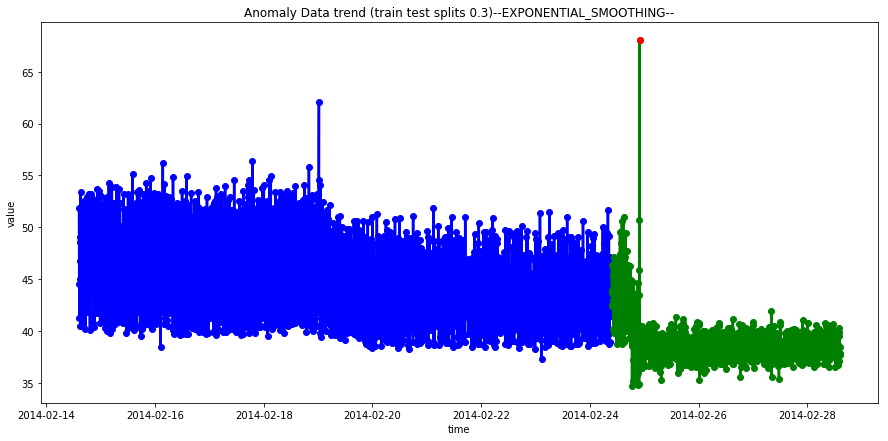

In [151]:
plat_test = [date2num(d)  for d in ts_test]
plt.figure(figsize=(15, 7))
plt.plot_date(plat_train, train.y,color="blue", linewidth=2.5, linestyle="-")
plt.plot_date(plat_test_origin, test.y,color="green", linewidth=2.5, linestyle="-")
plt.plot_date(plat_test, adata_test,color="red", linewidth=2.5, linestyle="-")




plt.title('Anomaly Data trend (train test splits 0.3)--EXPONENTIAL_SMOOTHING--')
plt.xlabel('time')
plt.ylabel('value')
plt.show()

# DOUBLE_EXPONENTIAL_SMOOTHING Algorithm

In [152]:
from mlalgms.statsmodel import calculateDoubleExponentialSmoothingParameters

In [159]:
lower_bound, upper_bound= calculateDoubleExponentialSmoothingParameters(train, 0.2, 0.8, 2)
print(lower_bound, ", ", upper_bound) 


34.85021063157981 ,  51.40563559362147


In [160]:
ts_test, adata_test,flags =detectLowerUpperAnomalies(test, lower_bound , upper_bound, bound=1)

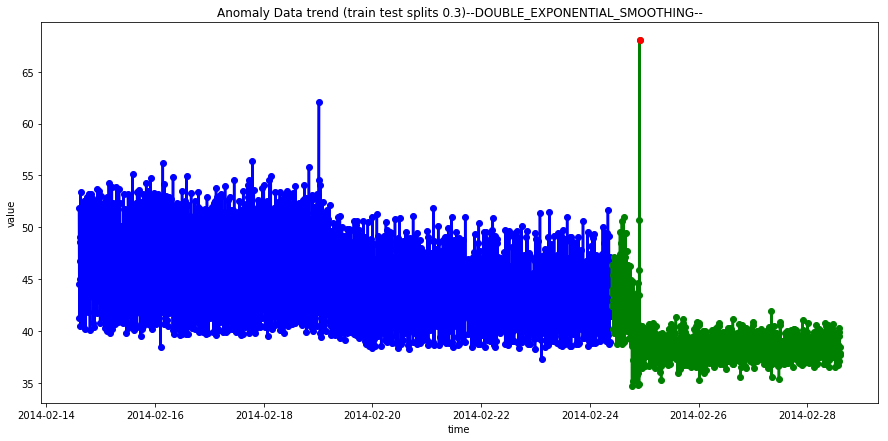

In [161]:
plat_test = [date2num(d)  for d in ts_test]
plt.figure(figsize=(15, 7))

plt.plot_date(plat_train, train.y,color="blue", linewidth=2.5, linestyle="-")
plt.plot_date(plat_test_origin, test.y,color="green", linewidth=2.5, linestyle="-")
plt.plot_date(plat_test, adata_test,color="red", linewidth=2.5, linestyle="-")




plt.title('Anomaly Data trend (train test splits 0.3)--DOUBLE_EXPONENTIAL_SMOOTHING--')
plt.xlabel('time')
plt.ylabel('value')
plt.show()

# PROPHET Algorithm

In [162]:
from mlalgms.fbprophet  import predictNoneSeasonalityProphetLast


In [163]:
def totimestamp(np_dt):
   return (np_dt - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


In [164]:

idx = train.index.get_values()
p_ts = [totimestamp(d) for d in idx]
print(type(p_ts[0]))
p_utc = [datetime.utcfromtimestamp(int(d)) for d in p_ts]
print(type(p_utc[0]))

df_prophet = addHeader (p_ts, train.y.values, p_utc,False)
#print(train.y)
#print(df_prophet)

#df_prophet['y'].notnull()

<class 'numpy.float64'>
<class 'datetime.datetime'>


/Users/pzou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  


In [165]:
lower_bound, upper_bound = predictNoneSeasonalityProphetLast(df_prophet, 1,'T') 
print(lower_bound, ", ", upper_bound) 


39.32598412816315 ,  47.70527509270841


In [166]:
ts_test, adata_test,flags =detectLowerUpperAnomalies(test, lower_bound , upper_bound, bound=1)

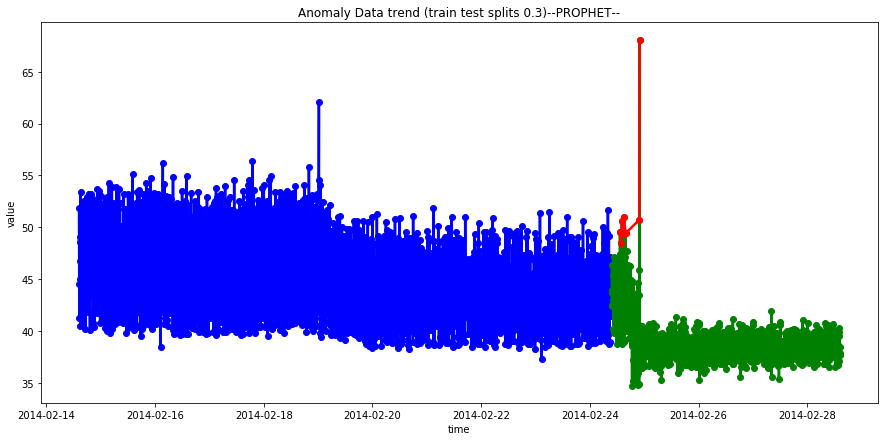

In [167]:
plat_test = [date2num(d)  for d in ts_test]
plt.figure(figsize=(15, 7))

plt.plot_date(plat_train, train.y,color="blue", linewidth=2.5, linestyle="-")
plt.plot_date(plat_test_origin, test.y,color="green", linewidth=2.5, linestyle="-")

plt.plot_date(plat_test, adata_test,color="red", linewidth=2.5, linestyle="-")

plt.title('Anomaly Data trend (train test splits 0.3)--PROPHET--')
plt.xlabel('time')
plt.ylabel('value')
plt.show()